In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
titanic = pd.read_csv('titanic data.csv')

In [52]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
#Find missing value in age column:
titanic['Age'].isnull().sum()

177

In [54]:
#Finding missing value in each column
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
#Remove Cabin column
titanic = titanic.drop(columns = ['Cabin'])

In [56]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [57]:
#placing missing value with mean
titanic.fillna(titanic.mean(), inplace=True)

In [58]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [59]:
td = titanic.values

In [60]:
len(titanic)

891

In [61]:
#Replacing missing Emvarked with most frequent value of value of Embarked
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer = imputer.fit(td[:,:-1])
td[:,:-1] = imputer.transform(td[:,:-1])
# Cross Checking for null value in Embarked column
pd.isnull(td[:,:-1]).sum()

0

In [62]:
#Part-4: Visualization
def plot_bar_x(label, val, xl, yl, t):
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, val)
    plt.xlabel(xl, fontsize=15)
    plt.ylabel(yl, fontsize=15)
    plt.xticks(index, label, fontsize=15, rotation=30)
    plt.title(t, fontsize=17)
    plt.show()

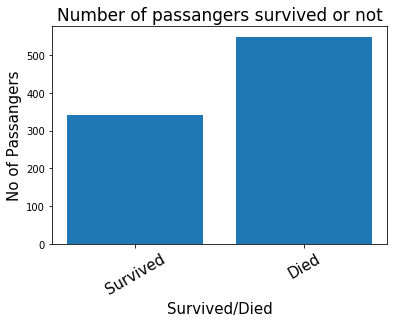

In [63]:
# 4(a) : Number of passangers survived or not
survive = 0
died = 0
for i in range(len(titanic)): 
  if titanic['Survived'][i] == 1:
    survive += 1
  else:
    died += 1

label = ['Survived','Died']
val = [survive, died]

xl = 'Survived/Died'
yl = 'No of Passangers'
t = 'Number of passangers survived or not'

plot_bar_x(label, val, xl, yl, t)

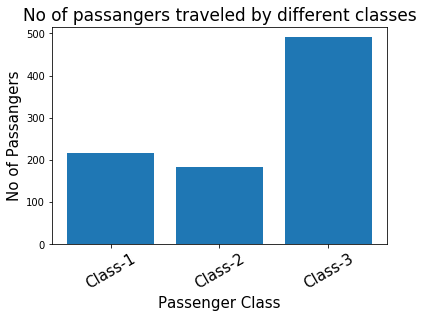

In [64]:
# 4(b) : Number of passangers traveled by class 1, class 2 and class 3 
class_1 = 0
class_2 = 0
class_3 = 0
for i in range(len(titanic)): 
  if titanic['Pclass'][i] == 1:
    class_1 += 1
  elif titanic['Pclass'][i] ==2:
    class_2 += 1
  elif titanic['Pclass'][i] ==3:
    class_3 += 1

label = ['Class-1','Class-2','Class-3']
val = [class_1,class_2,class_3]

xl = 'Passenger Class'
yl = 'No of Passangers'
t = 'No of passangers traveled by different classes'

plot_bar_x(label, val, xl, yl, t)

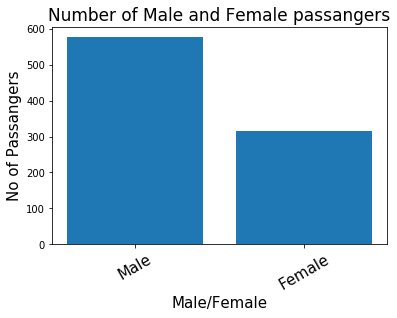

In [65]:
# 4(c) : Number of Male and Female passangers
male_count = 0
female_count = 0
for i in range(len(titanic)): 
  if titanic['Sex'][i] == 'male':
    male_count += 1
  elif titanic['Sex'][i] == 'female':
    female_count += 1

label = ['Male','Female']
val = [male_count, female_count]

xl = 'Male/Female'
yl = 'No of Passangers'
t = 'Number of Male and Female passangers'

plot_bar_x(label, val, xl, yl, t)

In [66]:
"""
lab = ['Male','Female']
v = titanic['Sex'].values
w=0.5
plt.bar(lab,v,w)
"""


"\nlab = ['Male','Female']\nv = titanic['Sex'].values\nw=0.5\nplt.bar(lab,v,w)\n"

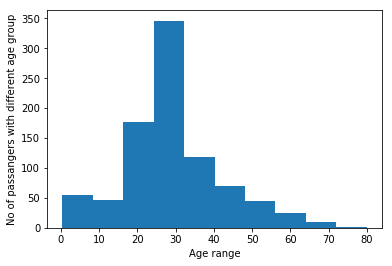

In [67]:
# 4(d) : Histogram for difference ages
X = titanic['Age'].values
plt.hist(X, bins=10)
plt.xlabel('Age range')
plt.ylabel('No of passangers with different age group')
plt.show()

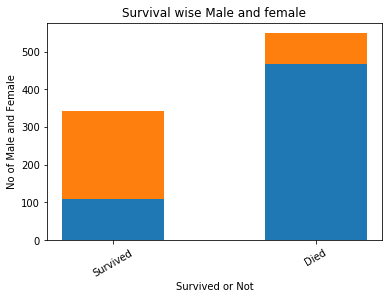

In [68]:
# 4(e-1) Stacked bar plot for Survival wise male and female
survived = 0
died = 0
survived_M = 0
died_M = 0


for i in range(len(titanic)): 
  if titanic['Survived'][i] == 1:
    survived += 1
    if titanic['Sex'][i] == 'male':      
      survived_M += 1
  elif titanic['Survived'][i] == 0:
    died += 1
    if titanic['Sex'][i] == 'male':      
      died_M += 1
      

survived_F = survived - survived_M
died_F = died - died_M   
stack_label = ['Survived','Died']
stack_val_male = [survived_M, died_M]
stack_val_female = [survived_F, died_F]
width = 0.5
stack_index = np.arange(len(stack_label))

p1 = plt.bar(stack_label, stack_val_male, width)
p2 = plt.bar(stack_label, stack_val_female, width,bottom=stack_val_male)
plt.title('Survival wise Male and female')
plt.xlabel('Survived or Not')
plt.ylabel('No of Male and Female')
plt.xticks(stack_index,stack_label,rotation=30)
plt.show()

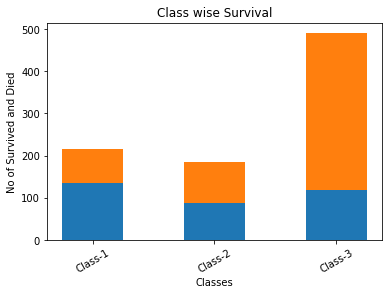

In [69]:
# 4(e-2) Stacked bar plot for Class wise passenger survival
class_1 = 0
class_2 = 0
class_3 = 0
class_1_S = 0
class_2_S = 0
class_3_S = 0

for i in range(len(titanic)): 
  if titanic['Pclass'][i] == 1:
    class_1 += 1
    if titanic['Survived'][i] == 1:      
      class_1_S += 1
  elif titanic['Pclass'][i] ==2:
    class_2 += 1
    if titanic['Survived'][i] == 1:      
      class_2_S += 1
  elif titanic['Pclass'][i] ==3:
    class_3 += 1
    if titanic['Survived'][i] == 1:      
      class_3_S += 1
      

class_1_D = class_1 - class_1_S
class_2_D = class_2 - class_2_S
class_3_D = class_3 - class_3_S     
stack_label = ['Class-1','Class-2','Class-3']
stack_val_Survived = [class_1_S, class_2_S, class_3_S]
stack_val_Died = [class_1_D, class_2_D, class_3_D]
width = 0.5
stack_index = np.arange(len(stack_label))

p1 = plt.bar(stack_label, stack_val_Survived, width)
p2 = plt.bar(stack_label, stack_val_Died, width,bottom=stack_val_Survived)
plt.title('Class wise Survival')
plt.xlabel('Classes')
plt.ylabel('No of Survived and Died')
plt.xticks(stack_index,stack_label,rotation=30)
#plt.yticks()
plt.show()

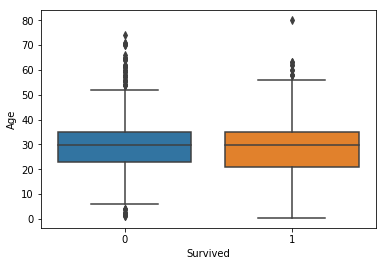

In [70]:
# 4(f)Box plot Age wise survival
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=titanic['Survived'], y=titanic['Age'], data=tips)